In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split #sklearn package's randomized data splitting function
from sklearn.linear_model import LinearRegression

In [57]:
data1=pd.read_csv("car-mpg.xls")

In [58]:
data1

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,1,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,1,ford ranger


In [59]:
data1.shape

(398, 10)

In [60]:
data1.head(20)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,0,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,0,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,0,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,0,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,0,amc ambassador dpl


In [61]:
data1.tail()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
393,27.0,4,140.0,86,2790,15.6,82,1,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,1,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,1,chevy s-10


In [62]:
data1=data1.drop('car_name',axis=1)

In [63]:
data1

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,1
394,44.0,4,97.0,52,2130,24.6,82,2,1
395,32.0,4,135.0,84,2295,11.6,82,1,1
396,28.0,4,120.0,79,2625,18.6,82,1,1


# replace catagorical values in origin with original values

In [64]:
data1['origin']=data1['origin'].replace({1:'US',2:'England',3:'Japan'})
data1

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,US,0
1,15.0,8,350.0,165,3693,11.5,70,US,0
2,18.0,8,318.0,150,3436,11.0,70,US,0
3,16.0,8,304.0,150,3433,12.0,70,US,0
4,17.0,8,302.0,140,3449,10.5,70,US,0
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,US,1
394,44.0,4,97.0,52,2130,24.6,82,England,1
395,32.0,4,135.0,84,2295,11.6,82,US,1
396,28.0,4,120.0,79,2625,18.6,82,US,1


In [65]:
data1.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
58,25.0,4,97.5,80,2126,17.0,72,US,1
214,13.0,8,302.0,130,3870,15.0,76,US,0
273,23.9,4,119.0,97,2405,14.9,78,Japan,1
53,31.0,4,71.0,65,1773,19.0,71,Japan,1
238,33.5,4,98.0,83,2075,15.9,77,US,1
103,11.0,8,400.0,150,4997,14.0,73,US,0
313,28.0,4,151.0,90,2678,16.5,80,US,1
38,14.0,8,350.0,165,4209,12.0,71,US,0
185,26.0,4,98.0,79,2255,17.7,76,US,1
390,32.0,4,144.0,96,2665,13.9,82,Japan,1


# One hot encoding

In [66]:
data1=pd.get_dummies(data1,columns=['origin'])
data1.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_England,origin_Japan,origin_US
360,30.7,6,145.0,76,3160,19.6,81,0,1,0,0
391,36.0,4,135.0,84,2370,13.0,82,1,0,0,1
136,16.0,8,302.0,140,4141,14.0,74,0,0,0,1
10,15.0,8,383.0,170,3563,10.0,70,0,0,0,1
346,32.3,4,97.0,67,2065,17.8,81,1,0,1,0
100,18.0,6,250.0,88,3021,16.5,73,0,0,0,1
392,27.0,4,151.0,90,2950,17.3,82,1,0,0,1
85,13.0,8,350.0,175,4100,13.0,73,0,0,0,1
379,36.0,4,98.0,70,2125,17.3,82,1,0,0,1
36,19.0,6,250.0,88,3302,15.5,71,0,0,0,1


In [67]:
data1.describe()

,mpg,cyl,disp,wt,acc,yr,car_type,origin_England,origin_Japan,origin_US
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,0.530151,0.175879,0.198492,0.625628
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.499718,0.381197,0.399367,0.484569
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000,0.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,0.000000,0.000000,0.000000,0.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000,0.000000,0.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,1.000000,0.000000,0.000000,1.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mpg             398 non-null    float64
 1   cyl             398 non-null    int64  
 2   disp            398 non-null    float64
 3   hp              398 non-null    object 
 4   wt              398 non-null    int64  
 5   acc             398 non-null    float64
 6   yr              398 non-null    int64  
 7   car_type        398 non-null    int64  
 8   origin_England  398 non-null    uint8  
 9   origin_Japan    398 non-null    uint8  
 10  origin_US       398 non-null    uint8  
dtypes: float64(3), int64(4), object(1), uint8(3)
memory usage: 26.2+ KB


In [69]:
check=pd.DataFrame(data1.hp.str.isdigit())   ## assign only hp column with digits in dataframe check
data1[check.hp==False]    ## data1 with non-digit hp columns

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_England,origin_Japan,origin_US
32,25.0,4,98.0,?,2046,19.0,71,1,0,0,1
126,21.0,6,200.0,?,2875,17.0,74,0,0,0,1
330,40.9,4,85.0,?,1835,17.3,80,1,1,0,0
336,23.6,4,140.0,?,2905,14.3,80,1,0,0,1
354,34.5,4,100.0,?,2320,15.8,81,1,1,0,0
374,23.0,4,151.0,?,3035,20.5,82,1,0,0,1


In [70]:
data1[data1.hp.str.isdigit()==False]  ##alternate way for above code

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_England,origin_Japan,origin_US
32,25.0,4,98.0,?,2046,19.0,71,1,0,0,1
126,21.0,6,200.0,?,2875,17.0,74,0,0,0,1
330,40.9,4,85.0,?,1835,17.3,80,1,1,0,0
336,23.6,4,140.0,?,2905,14.3,80,1,0,0,1
354,34.5,4,100.0,?,2320,15.8,81,1,1,0,0
374,23.0,4,151.0,?,3035,20.5,82,1,0,0,1


# Replace missing values with nan

In [71]:
data1=data1.replace('?',np.nan)
data1[check.hp==False]

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_England,origin_Japan,origin_US
32,25.0,4,98.0,NaN,2046,19.0,71,1,0,0,1
126,21.0,6,200.0,NaN,2875,17.0,74,0,0,0,1
330,40.9,4,85.0,NaN,1835,17.3,80,1,1,0,0
336,23.6,4,140.0,NaN,2905,14.3,80,1,0,0,1
354,34.5,4,100.0,NaN,2320,15.8,81,1,1,0,0
374,23.0,4,151.0,NaN,3035,20.5,82,1,0,0,1


In [72]:
data1.median()

mpg                 23.0
cyl                  4.0
disp               148.5
hp                  93.5
wt                2803.5
acc                 15.5
yr                  76.0
car_type             1.0
origin_England       0.0
origin_Japan         0.0
origin_US            1.0
dtype: float64

In [74]:
# Replace missing values with median value
# we dont need to specify column name
# every columns missing value will be replaced by that columns median

In [77]:
check2=lambda x:x.fillna(x.median())
data1=data1.apply(check2,axis=0)
data1.hp=data1.hp.astype('float64') ##int64 will round off the median, use float64 for the exact decimal value

In [78]:
data1.iloc[30:35,:]

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_England,origin_Japan,origin_US
30,28.0,4,140.0,90.0,2264,15.5,71,1,0,0,1
31,25.0,4,113.0,95.0,2228,14.0,71,1,0,1,0
32,25.0,4,98.0,93.0,2046,19.0,71,1,0,0,1
33,19.0,6,232.0,100.0,2634,13.0,71,0,0,0,1
34,16.0,6,225.0,105.0,3439,15.5,71,0,0,0,1


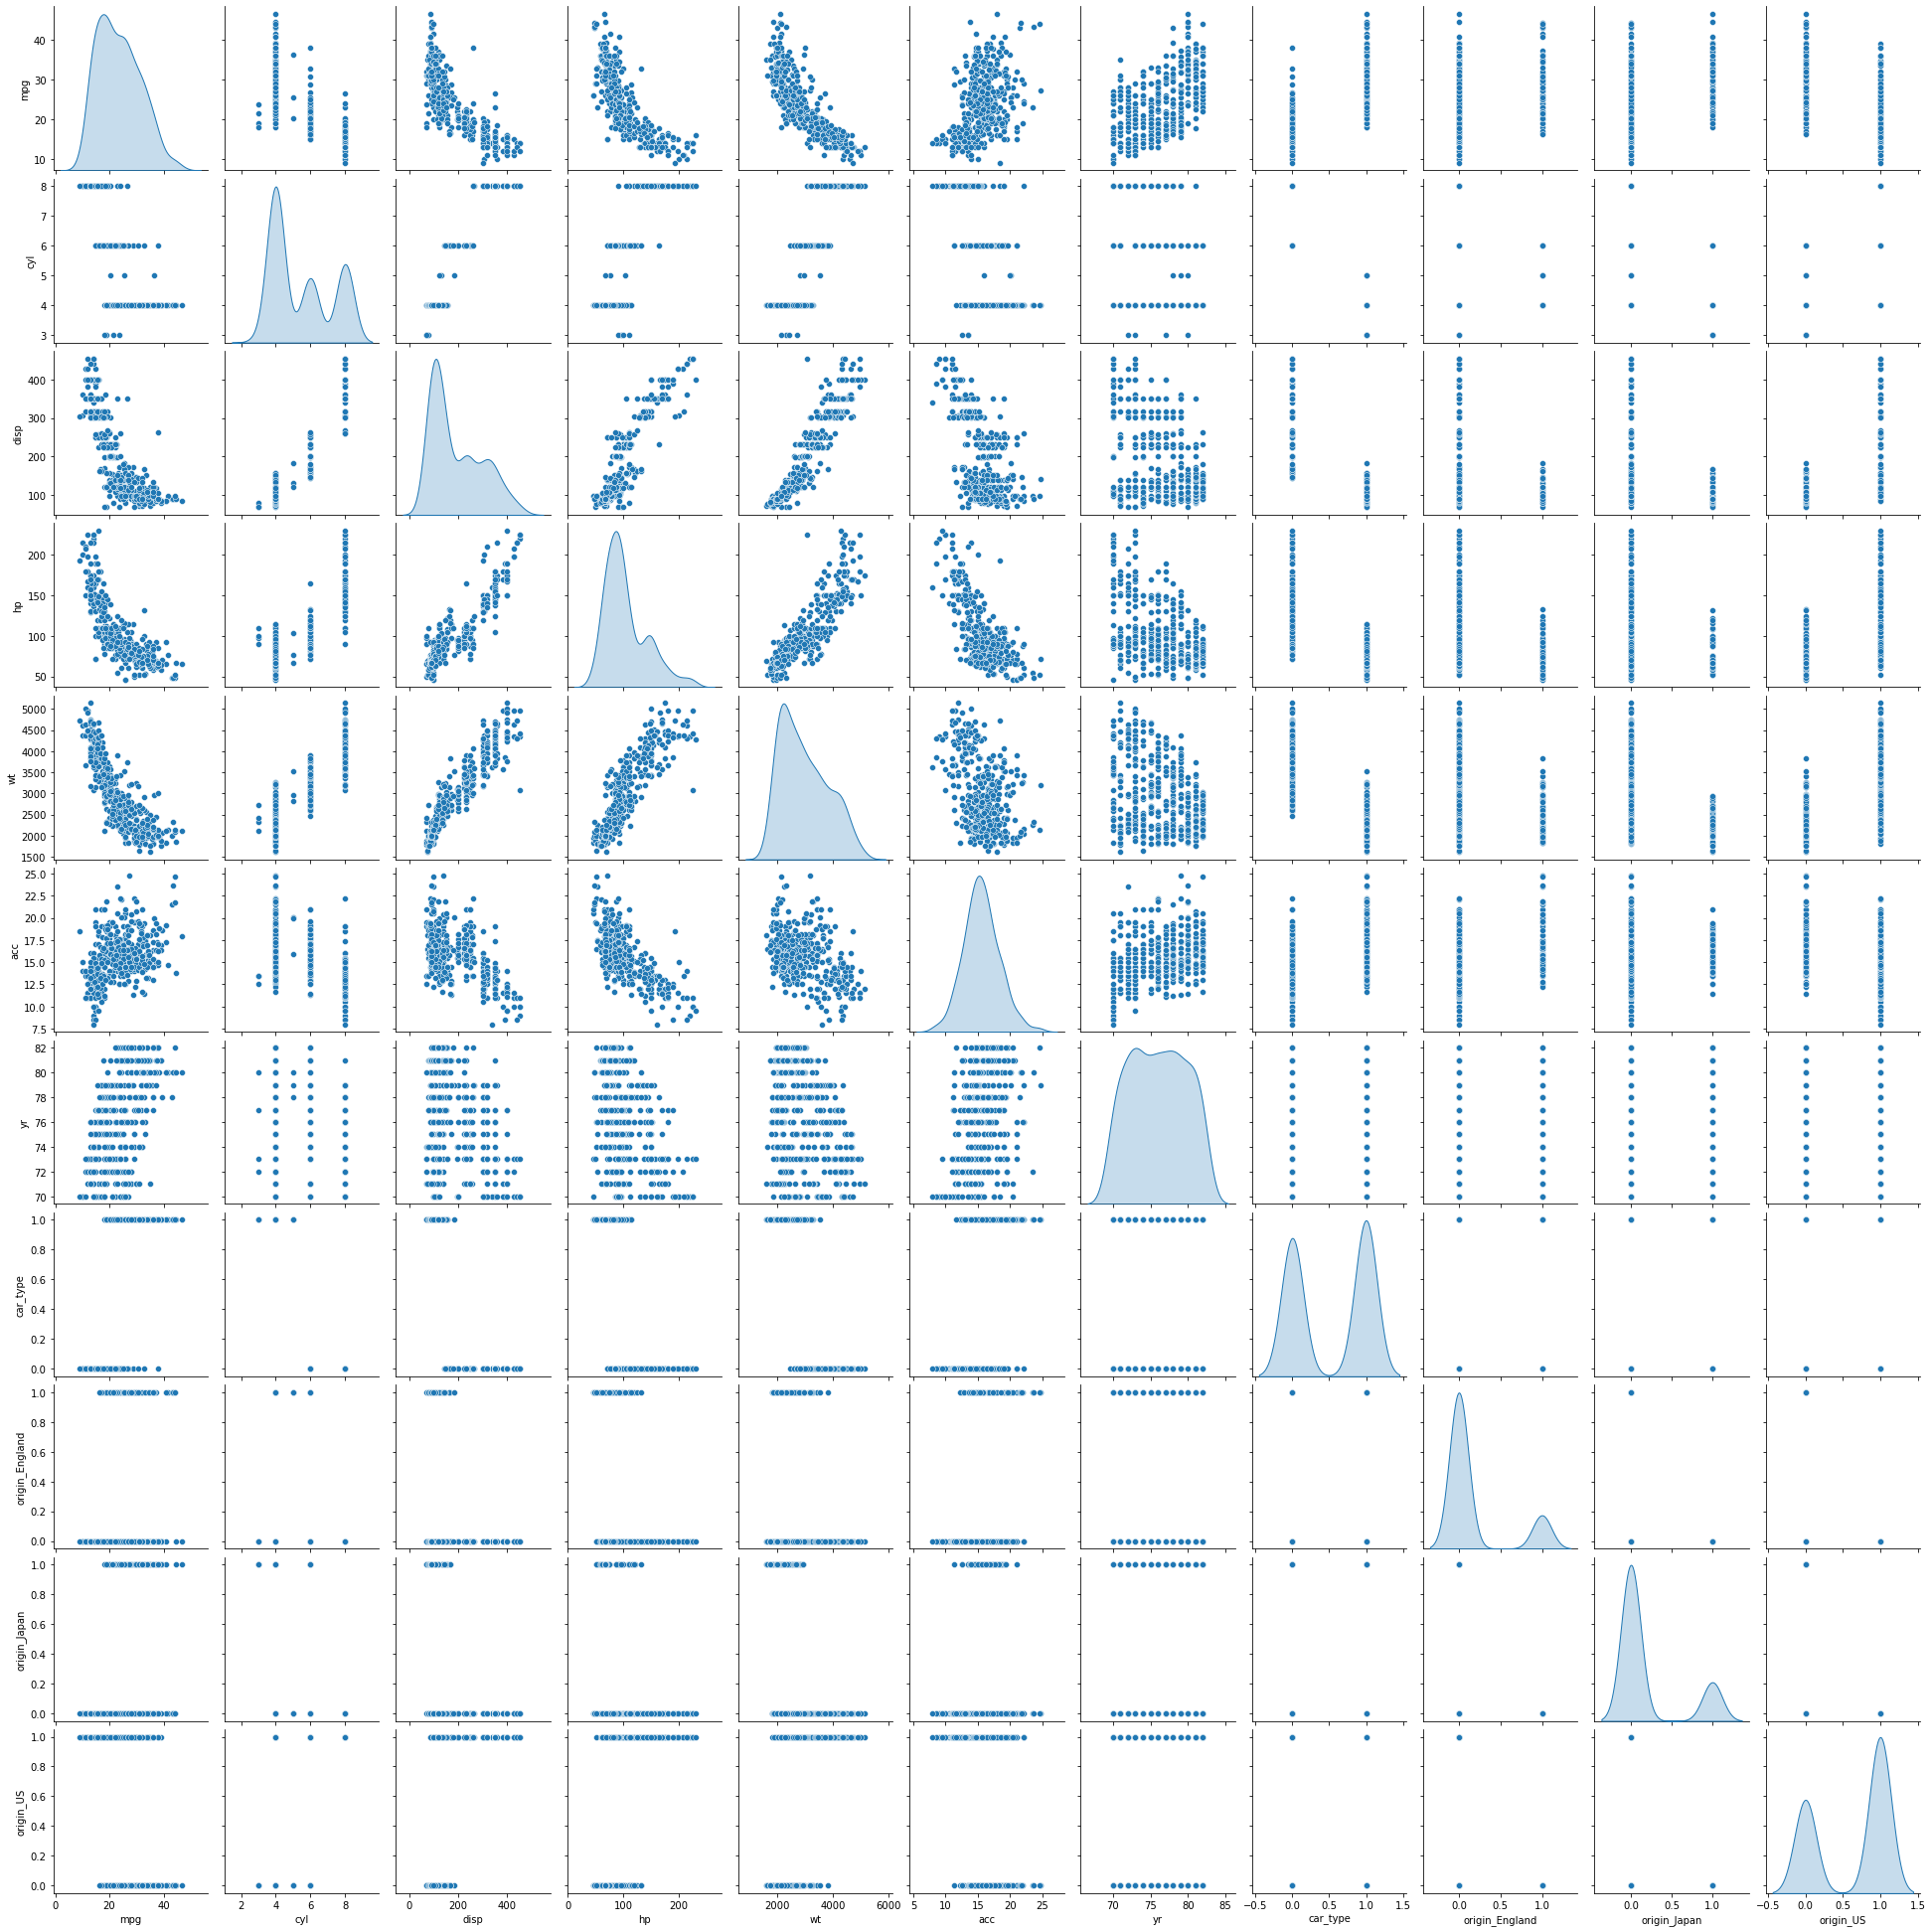

In [79]:
sns.pairplot(data1,diag_kind='kde')

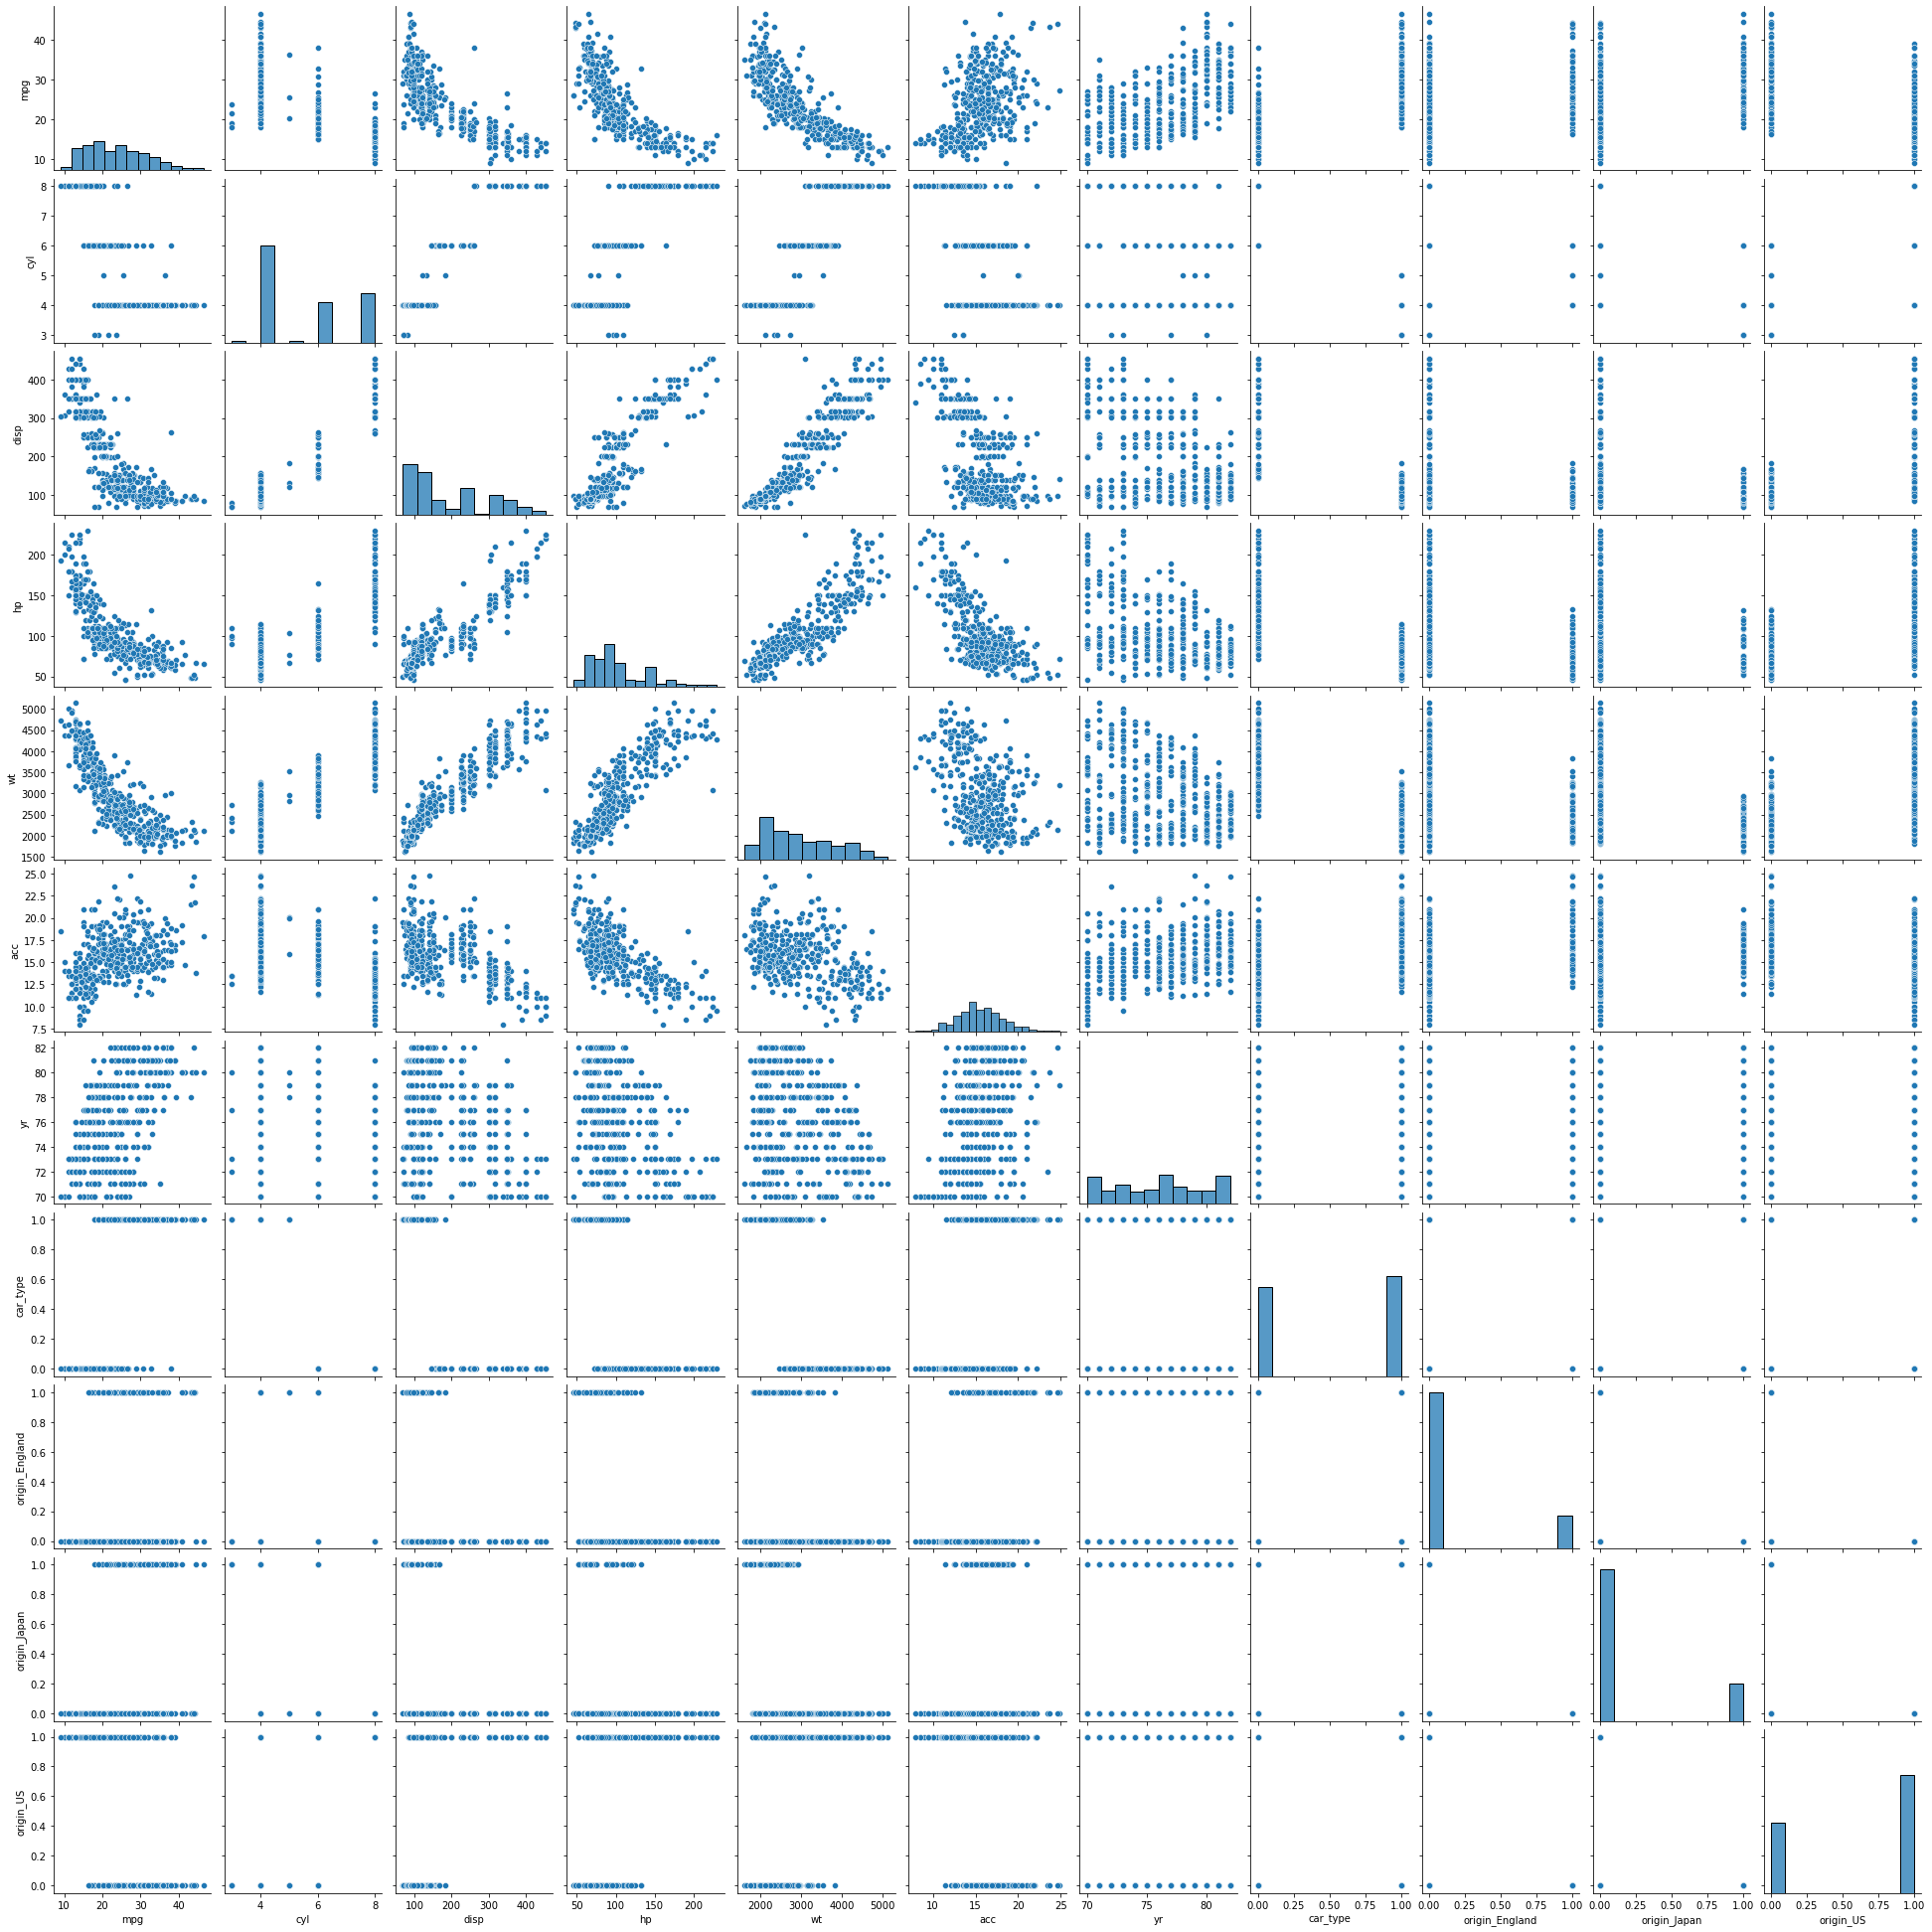

In [80]:
sns.pairplot(data1) #without kde

# Split the data

In [81]:
x=data1.drop(['mpg'],axis=1)
y=data1.mpg
# split x and y into train and test data with 75:25 ratio
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.27,random_state=100) # random_state is not compulsory 


# Fit linear model

In [82]:
reg_model= LinearRegression()
reg_model.fit(x_train,y_train)

LinearRegression()

In [83]:
# score R^2 for in sample and out sample

In [84]:
reg_model.score(x_train,y_train)

0.838046716662467

In [85]:
reg_model.score(x_test,y_test)

0.8476581018809464